# 과제2. [평가]Mobile 고객 이탈 분석

* 여러분은 OO 통신화사 데이터분석가 입니다.
* 회사는 약정기간이 끝난 고객이 번호이동(이탈)해 가는 문제를 해결하고자 합니다.
* 그래서 여러분에게, 어떤 고객이 번호이동(이탈)해 가는지 데이터분석을 의뢰하였습니다.
* 고객 이탈여부(CHURN)에 영향을 주는 요인을 찾아 봅시다.

![](https://d18lkz4dllo6v2.cloudfront.net/cumulus_uploads/entry/23964/mobile%20phones.png)

## 0.환경설정

### 1) 라이브러리 로딩

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.graphics.mosaicplot import mosaic
from scipy import stats as spst
import statsmodels.api as sm

* 한글 폰트 적용

In [2]:
import platform
import seaborn as sns 
from matplotlib import font_manager, rc 

path = "C:/Windows/Fonts/malgun.ttf"

if platform.system() == "Darwin":
    rc("font", family="Arial Unicode MS")
elif platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc("font", family=font_name)
else:
    print("Unknown system. sorry")

### 2) 데이터 로딩

In [3]:
# mobile data
data_path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/mobile_NA2.csv"
mobile = pd.read_csv(data_path)
mobile.drop(['id', 'REPORTED_USAGE_LEVEL','OVER_15MINS_CALLS_PER_MONTH'], axis = 1, inplace = True)
mobile.head()

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,CONSIDERING_CHANGE_OF_PLAN,CHURN
0,1,47711,183,17,730589.0,192,5,unsat,considering,0
1,0,74132,191,43,535092.0,349,2,unsat,no,1
2,1,150419,0,14,204004.0,682,6,unsat,considering,0
3,0,159567,0,58,281969.0,634,1,very_unsat,never_thought,0
4,1,23392,0,0,216707.0,233,15,unsat,no,1


|변수 명|내용|구분|
|	----	|	----	|	----	|
|	COLLEGE	|	대학졸업 여부(1,0)	|		|
|	INCOME	|	연 수입액(달러)	|		|
|	OVERAGE	|	월 초과사용 시간(분)	|		|
|	LEFTOVER	|	월 사용 잔여시간(%)	|		|
|	HOUSE	|	집 가격(달러)	|		|
|	HANDSET_PRICE	|	핸드폰 가격(달러)	|		|
|	AVERAGE_CALL_DURATION	|	평균 통화시간(분)	|		|
|	REPORTED_SATISFACTION	|	만족도 설문('very_unsat', 'unsat', 'avg', 'sat', 'very_sat' )	|		|
|	CONSIDERING_CHANGE_OF_PLAN	|	변경 계획 설문('never_thought', 'no', 'perhaps(아마도)', 'considering(고려)',   'actively_looking_into_it(긍정적으로 생각중)')	|		|
|	**CHURN**	|	이탈여부(1 : 이탈, 0 : 잔류)	|	Label	|


----

## 문제 정의

00 통신회사 내에 고객들이 번호이동(이탈)을 하는 문제가 있기에, 고객 Data를 통해 고객이 번호이동(이탈)을 하는 원인을 파악하고자 한다.

## 1.가설수립

* 숫자형 최소 3개이상, 범주형 최소 2개 이상씩, 전체 6개의 변수를 도출, 가설을 수립하시오.


* 가설1 : 고객이 00통신회사의 이용에 대한 만족도에 따라서 번호이동(이탈)여부에 관계가 있을 것이다.


* 가설2 : 고객이 00통신회사의 이용하면서 월 사용 잔여 시간에 따라 번호이동(이탈)과 관계가 있을 것이다.


* 가설3 : 고객이 00통신회사의 이용하면서 휴대폰 가격에 따라 번호이동(이탈) 여부와 관련 있을 것이다.


* 가설4 : 고객이 00통신회사의 이용하면서 평균 통화시간에 따라 번호이동(이탈) 여부와 관련이 있을 것이다.


* 가설5 : 00통신회사의 고객이 대학 졸업여부에 따라 번호이동(이탈) 여부와 관련이 있을 것이다.


* 가설6 :00통신회사의 이용하는 고객이 연 수입액이 증가함에 따라 월 사용 잔여 시간이 하락하는 관계가 있을 것이다.


* 가설7 : 고객이 00통신회사의 이용에 대한 만족도에 따라서 변경 계획 설문 결과에 관계가 있을 것이다.


----

## 전체 데이터 정보 탐색

In [4]:
print(mobile.shape)

(18000, 10)


In [5]:
mobile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   COLLEGE                     18000 non-null  int64  
 1   INCOME                      18000 non-null  int64  
 2   OVERAGE                     18000 non-null  int64  
 3   LEFTOVER                    18000 non-null  int64  
 4   HOUSE                       17785 non-null  float64
 5   HANDSET_PRICE               18000 non-null  int64  
 6   AVERAGE_CALL_DURATION       18000 non-null  int64  
 7   REPORTED_SATISFACTION       17962 non-null  object 
 8   CONSIDERING_CHANGE_OF_PLAN  18000 non-null  object 
 9   CHURN                       18000 non-null  int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 1.4+ MB


몇몇 컬럼에 Nan값이 존재한다.

In [6]:
mobile.describe().iloc[1:,1:].style.background_gradient(cmap='PuBu')

,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,AVERAGE_CALL_DURATION,CHURN
mean,80314.400278,86.014833,23.995500,492950.532696,390.096667,5.990944,0.492722
std,41703.420130,85.963981,26.860363,252175.173507,214.239639,4.398894,0.499961
min,20007.000000,-2.000000,0.000000,150015.000000,130.000000,1.000000,0.000000
25%,42151.500000,0.000000,0.000000,263876.000000,219.000000,2.000000,0.000000
50%,75501.500000,59.000000,14.500000,452277.000000,326.000000,5.000000,0.000000
75%,116082.250000,179.000000,42.000000,701460.000000,536.000000,10.000000,1.000000
max,159983.000000,335.000000,89.000000,999970.000000,899.000000,15.000000,1.000000


숫자가 큰것도 있고, 숫자가 작은 열도 존재한다.

## 2.단변량 분석

① 변수의 비즈니스 의미  

② 숫자? 범주?  

③ 전처리 사항
   - NaN 존재 여부 및 조치 방안  
   - 가변수화 대상여부  
   
④ 기초통계량

⑤ 분포  

⑥ 위 정보로부터 파악한 내용(비즈니스!) 정리  

⑦ 추가 분석해볼 사항 도출

### 1) REPORTED_SATISFACTION(X)

In [80]:
feature = "REPORTED_SATISFACTION"

mobile[feature].unique()

array(['unsat', 'very_unsat', 'very_sat', 'sat', 'avg'], dtype=object)

1) 변수의 비즈니스 의미
* 만족도 설문('unsat', 'very_unsat', 'very_sat', 'sat', nan, 'avg')

2) 데이터 유형 : 숫자, 범주?
* 범주

3) NaN 존재 유무 및 조치 방안

In [81]:
mobile[feature].isna().sum()

0

> 38개가 존재.

In [82]:
print("전체 데이터에서 Nan값이 존재하는 퍼센트 : ",round(38/ mobile.shape[0],3))

전체 데이터에서 Nan값이 존재하는 퍼센트 :  0.002


전체 데이터에서 Nan값이 존재하는 퍼센트가 매우 낮다. 그렇기에 해당 행을 제거하거나 값을 채워야한다. Nan 조치에 대한 처리를 채우는 쪽으로 하고자 하며 이 Nan에 대해서 생각을 했을때, 만족도 조사를 하지 않은 고객 38명은 불만족하여 채우지 않은게 아닌가 조심스례 생각하게 되었고, 그 바탕으로 null 값일때 번호이동 유무의 비율과 만족도별 번호이동 비율을 비교하여 이게 유의미한지 파악하고 중요하지 않는 데이터라고 판단되면 해당 데이터를 삭제하고자 한다.

* null 값일때 번호이동 비율

In [83]:
mobile[mobile[feature].isnull()]["CHURN"].value_counts() / 38

Series([], Name: CHURN, dtype: float64)

In [84]:
pd.crosstab(mobile[mobile[feature].notnull()]["CHURN"],mobile[mobile[feature].notnull()][feature],normalize= "columns")

REPORTED_SATISFACTION,avg,sat,unsat,very_sat,very_unsat
CHURN,,,,,
0,0.527132,0.527897,0.499164,0.511618,0.50099
1,0.472868,0.472103,0.500836,0.488382,0.49901


비율이 비슷한게 있지만 대부분 번호이탈이 비슷한 추세로 보인다. 그렇기에 해당 null값을 삭제하고 분석하고자 한다.

In [85]:
print("삭제 전 데이터 크기 : ",mobile.shape[0])
mobile = mobile[mobile[feature].notnull()]
print("삭제 후 데이터 크기 : ",mobile.shape[0])

삭제 전 데이터 크기 :  17962
삭제 후 데이터 크기 :  17962


4) 가변수화 필요 여부

* 범주형이고, 이진 값이 아니므로 가변수화 필요

5) 기초통계량(수치화)

In [86]:
# 범주별 빈도수
mobile[feature].value_counts()

very_unsat    7072
very_sat      4562
unsat         3590
avg           1806
sat            932
Name: REPORTED_SATISFACTION, dtype: int64

6) 시각화

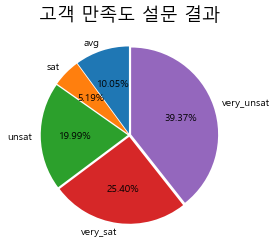

In [87]:
plt.title("고객 만족도 설문 결과",size= 18)
table = mobile[feature].value_counts().sort_index()
plt.pie(table.values,
    labels= table.sort_index().index,
    autopct = '%.2f%%',startangle=90,explode = [0.02, 0.02, 0.02, 0.02,0.02])

plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 매우 불만족한 고객이 약 39%이고, 매우 만족이 약 25%이며, 불만족은 약 20%로 현재 00 통신회사 고객들이 약 59%가 불만족을 나타낸 상황이다. 그렇기에 고객들의 불만을 잡을 아이디어가 필요해 보인다. 

8) 추가 분석해 볼 사항이 있나요?
* 불만족한 고객들이 과연 만족하는 고객보다 더 번호이동을 하는지 분석해보고자 합니다.

In [90]:
# 추가분석 -> 불만족한 고객이 과연 만족하는 고객보다 번호이동을 하는지 확인해야한다. -> 시각화
mobile.loc[(mobile[feature] =="very_unsat") | (mobile[feature] =="unsat"), "feature2"] = "unsat"

mobile.loc[(mobile[feature] =="very_sat") | (mobile[feature] =="sat"), "feature2"] = "sat"
mobile.loc[(mobile[feature] =="avg"), "feature2"] = "avg"

In [94]:
pd.crosstab(mobile["CHURN"],mobile["feature2"],normalize="columns")

feature2,avg,sat,unsat
CHURN,,,
0,0.527132,0.514379,0.500375
1,0.472868,0.485621,0.499625


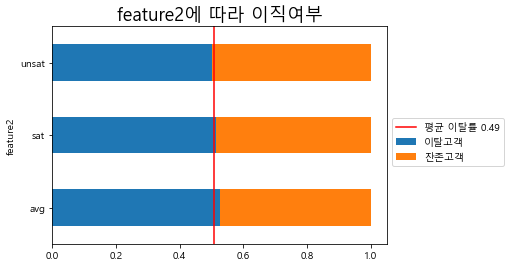

In [95]:
table = pd.crosstab(mobile["feature2"], mobile["CHURN"], normalize = 'index')
xl = "feature2"
table.plot.barh(stacked=True)
plt.axvline(1-mobile[target].mean(), color = 'r')
plt.title(f"{xl}에 따라 이직여부",size= 18)
plt.legend(labels= [f"평균 이탈률 {mobile[target].mean():.2f}",'이탈고객','잔존고객'],
           bbox_to_anchor=(1, 0.6))
plt.show()

### 2) CONSIDERING_CHANGE_OF_PLAN

In [16]:
feature = "CONSIDERING_CHANGE_OF_PLAN"

mobile[feature].unique()

array(['considering', 'no', 'never_thought', 'actively_looking_into_it',
       'perhaps'], dtype=object)

1) 변수의 비즈니스 의미
* 변경 계획 설문('considering', 'no', 'never_thought', 'actively_looking_into_it','perhaps')

2) 데이터 유형 : 숫자, 범주?
* 범주

3) NaN 존재 유무 및 조치 방안

In [17]:
mobile[feature].isna().sum()

0

> Nan 존재하지 않음.

4) 가변수화 필요 여부
* 범주형이고, 이진 값이 아니므로 가변수화 필요

5) 기초통계량(수치화)

In [18]:
# 범주별 빈도수
mobile[feature].value_counts()

considering                 7122
actively_looking_into_it    4446
no                          3639
never_thought               1800
perhaps                      955
Name: CONSIDERING_CHANGE_OF_PLAN, dtype: int64

6) 시각화

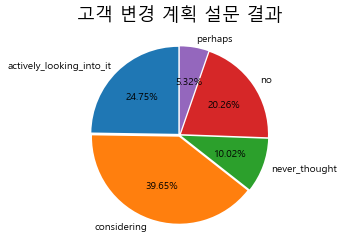

In [19]:
plt.title("고객 변경 계획 설문 결과",size= 18)
table = mobile[feature].value_counts().sort_index()
plt.pie(table.values,
    labels= table.sort_index().index,
    autopct = '%.2f%%',startangle=90,explode = [0.02, 0.02, 0.02, 0.02,0.02])

plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 변경 계획 설문 결과로 고려 중인 고객이 약 40%이고, 긍정적으로 생각중인 고객이 약 25%이다. 반면에 부정이라고 외친 고객은 약 30%로 아까 고객 만족도와 유사하게 00 통신회사에 대한 고객 이미지가 좋지 않아 보인다. 그렇기에 분석을 통해 고객이 긍정적인 이미지를 가질 수 있도록 불만에 대한 원인을 파악하는게 시급해 보이는 상황이다.
* 결론. 약 65% 고객이 번호이동을 고려하는 상황이며, 약 30% 고객만 고려하지 않는 상황이니 고객의 마음을 변동시킬 아이디어가 필요로 하다.

8) 추가 분석해 볼 사항이 있나요?
* 만족도 설물 결과와 변경 계획 설문의 결과를 조합하여 설문지에 대답은 했지만 고객이 번호 이동(이탈)을 하는지 추가 분석을 해볼말 한 가치가 있어 보인다.

### 3) LEFTOVER

In [20]:
feature = "LEFTOVER"

mobile[feature].unique()

array([17, 43, 14, 58,  0, 57, 18,  6, 84, 46, 12, 19,  8, 55,  7, 15, 32,
       88, 74, 21, 22, 77, 11, 24, 37, 87, 23, 64, 50, 80, 83, 38, 85, 36,
       16, 71, 89, 20, 68, 62, 27, 70,  9, 52, 13, 29, 30, 49,  5, 28, 48,
       66, 33, 69, 60, 25, 40, 67, 42, 31, 59, 86, 35, 61, 10, 39, 51, 44,
       63, 82, 73, 65, 54, 72, 81, 26, 53, 78, 75, 34, 45, 41, 79, 76, 47,
       56], dtype=int64)

1) 변수의 비즈니스 의미
* 월 사용 잔여시간(%)

2) 데이터 유형 : 숫자, 범주?
* 숫자

3) NaN 존재 유무 및 조치 방안

In [21]:
mobile[feature].isna().sum()

0

> Nan값이 존재하지 않는다.

4) 가변수화 필요 여부
* 숫자형이므로 필요 없음

5) 기초통계량(수치화)

In [22]:
mobile[feature].describe()

count    17962.000000
mean        23.980626
std         26.853695
min          0.000000
25%          0.000000
50%         14.000000
75%         42.000000
max         89.000000
Name: LEFTOVER, dtype: float64

6) 분포 확인(시각화)

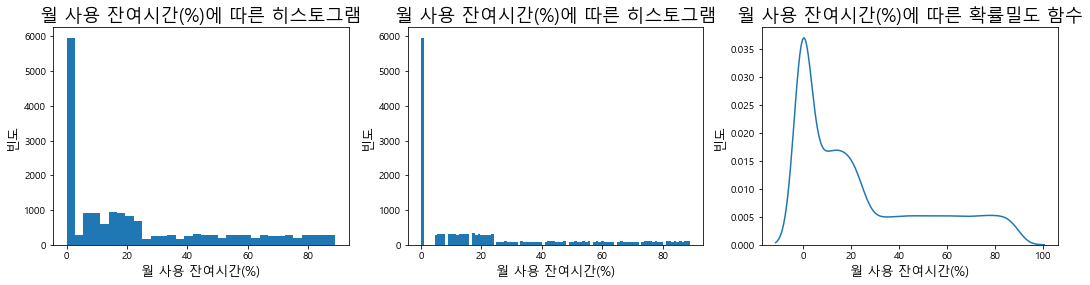

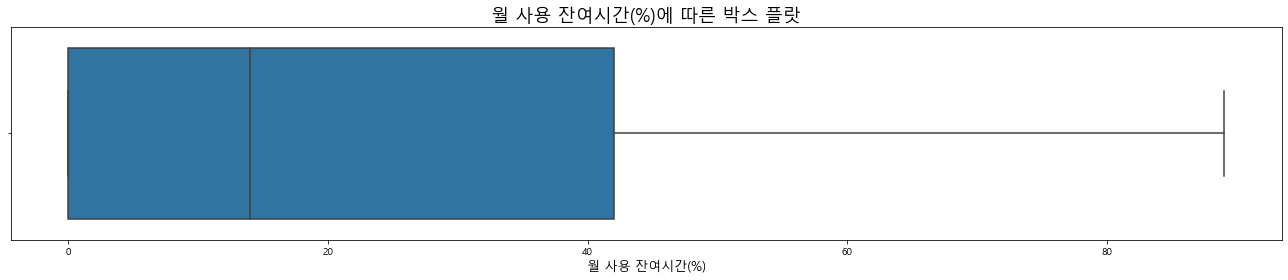

최빈값 :  0


In [23]:
plt.figure(figsize= (18,4))
plt.subplot(1,3,1)
plt.hist(mobile[feature],bins=32)
plt.title("월 사용 잔여시간(%)에 따른 히스토그램",size= 18)
plt.ylabel("빈도",size = 13)
plt.xlabel("월 사용 잔여시간(%)",size = 13)


plt.subplot(1,3,2)
plt.hist(mobile[feature],bins=100)
plt.title("월 사용 잔여시간(%)에 따른 히스토그램",size= 18)
plt.ylabel("빈도",size = 13)
plt.xlabel("월 사용 잔여시간(%)",size = 13)

plt.subplot(1,3,3)
sns.kdeplot(data=mobile ,x= feature)
plt.title("월 사용 잔여시간(%)에 따른 확률밀도 함수",size= 18)
plt.ylabel("빈도",size = 13)
plt.xlabel("월 사용 잔여시간(%)",size = 13)

plt.show()
plt.figure(figsize= (18,4))
sns.boxplot(data=mobile ,x=feature)
plt.title("월 사용 잔여시간(%)에 따른 박스 플랏",size= 18)
plt.xlabel("월 사용 잔여시간(%)",size = 13)

plt.tight_layout()
plt.show()
print("최빈값 : ",mobile[feature].mode()[0])

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 대부분 월 사용 잔여 시간이 0에 가깝게 분포되어 있으며, 히스토그램 구간을 100으로 하여 살펴보았을때, 월 잔여 시간 퍼센트가 약간의 구간이 나누어진것 처럼 보인다. 그래서 고민을 해보았을때, 월 잔여 시간이 남지 않는 고객과 약 20% 남은 고객과 20% 이상 남은 고객을 나누어 살펴본다면 해당 고객들의 특징이 있을 것으로 추측된다. 또한 월 잔여 시간을 100% 쓰는 고객이라면 00 통신회사에 만족할 수 있지만 현재 요금이 낮아서 100% 다 쓸 수 있기에 만족도까지 같이 추가 분석하면 의미있는 결과가 도출될 것으로 추측된다.

8) 추가 분석해 볼 사항이 있나요?
* 월 잔여 시간을 구간을 나누어 살펴보기
* 나눈 구간에 따라 만족도가 어떤지 더 나아가서 핸드폰 가격이 높으면 월 요금을 비싼거 써야하니 해당 부분이 포함된게 아닌지 분석이 가능하면 분석하고자 한다. -> 휴대폰이 비싸면 요금제가 비싸서.. 불만이 높아질 수 있다고 생각된다.


### 4) HANDSET_PRICE

In [24]:
feature = "HANDSET_PRICE"

mobile[feature].unique()[:10]

array([192, 349, 682, 634, 233, 714, 294, 362, 671, 263], dtype=int64)

1) 변수의 비즈니스 의미
* 핸드폰 가격(달러)

2) 데이터 유형 : 숫자, 범주?
* 숫자

3) NaN 존재 유무 및 조치 방안

In [25]:
mobile[feature].isna().sum()

0

> Nan값이 존재하지 않는다.

4) 가변수화 필요 여부
* 숫자형이므로 필요 없음

5) 기초통계량(수치화)

In [26]:
mobile[feature].describe()

count    17962.000000
mean       390.031845
std        214.164114
min        130.000000
25%        219.000000
50%        326.000000
75%        535.750000
max        899.000000
Name: HANDSET_PRICE, dtype: float64

6) 분포 확인(시각화)

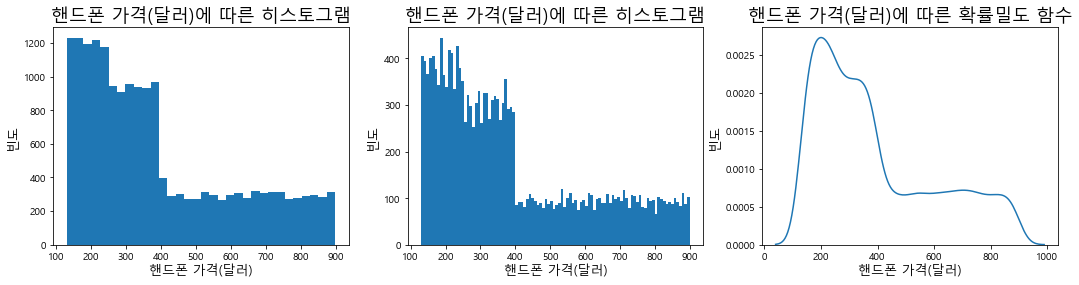

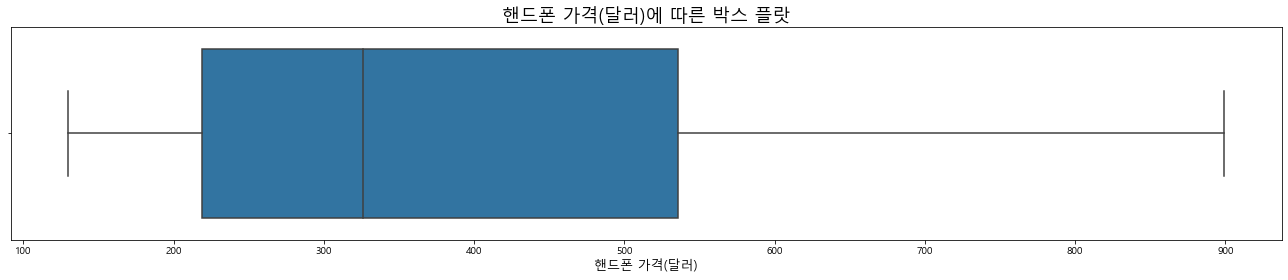

최빈값 :  160


In [27]:
plt.figure(figsize= (18,4))
x = "핸드폰 가격(달러)"

plt.subplot(1,3,1)
plt.hist(mobile[feature],bins=32)
plt.title(f"{x}에 따른 히스토그램",size= 18)
plt.ylabel("빈도",size = 13)
plt.xlabel(f"{x}",size = 13)


plt.subplot(1,3,2)
plt.hist(mobile[feature],bins=100)
plt.title(f"{x}에 따른 히스토그램",size= 18)
plt.ylabel("빈도",size = 13)
plt.xlabel(f"{x}",size = 13)

plt.subplot(1,3,3)
sns.kdeplot(data=mobile ,x= feature)
plt.title(f"{x}에 따른 확률밀도 함수",size= 18)
plt.ylabel("빈도",size = 13)
plt.xlabel(f"{x}",size = 13)

plt.show()
plt.figure(figsize= (18,4))
sns.boxplot(data=mobile ,x=feature)
plt.title(f"{x}에 따른 박스 플랏",size= 18)
plt.xlabel(f"{x}",size = 13)

plt.tight_layout()
plt.show()
print("최빈값 : ",mobile[feature].mode()[0])

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 핸드폰 가격의 분포가 기울어진 분포이며, 하위 25%가 219달라 안에서 휴대폰을 구매하였고, 25~50% 고객은 326달라 안에 구매를 하였다. 그렇기에 해당 히스토그램을 보고 핸드폰 구매 가격을 구간을 나누어 저가형 휴대폰 구매자, 중가형 구매자, 고가형 구매자를 나누어 핸드폰 번회이동 여부에 영향이 있는지 파악하고 통화 잔여 시간 등 분석하여 핸드폰 가격 구매 유형에 따라 어떤 취향인지 파악해보고자 한다.


8) 추가 분석해 볼 사항이 있나요?
* 가격대를 구분
* 구매 유형 별 고객 취향 파악

### 5) AVERAGE_CALL_DURATION

In [28]:
feature = "AVERAGE_CALL_DURATION"

mobile[feature].unique()

array([ 5,  2,  6,  1, 15,  4, 10,  9, 13, 12, 11, 14,  8], dtype=int64)

1) 변수의 비즈니스 의미
* 평균 통화시간(분)

2) 데이터 유형 : 숫자, 범주?
* 숫자

3) NaN 존재 유무 및 조치 방안

In [29]:
mobile[feature].isna().sum()

0

> Nan값이 존재하지 않는다.

4) 가변수화 필요 여부
* 숫자형이므로 필요 없음

5) 기초통계량(수치화)

In [30]:
mobile[feature].describe()

count    17962.000000
mean         5.993709
std          4.399806
min          1.000000
25%          2.000000
50%          5.000000
75%         10.000000
max         15.000000
Name: AVERAGE_CALL_DURATION, dtype: float64

6) 분포 확인(시각화)

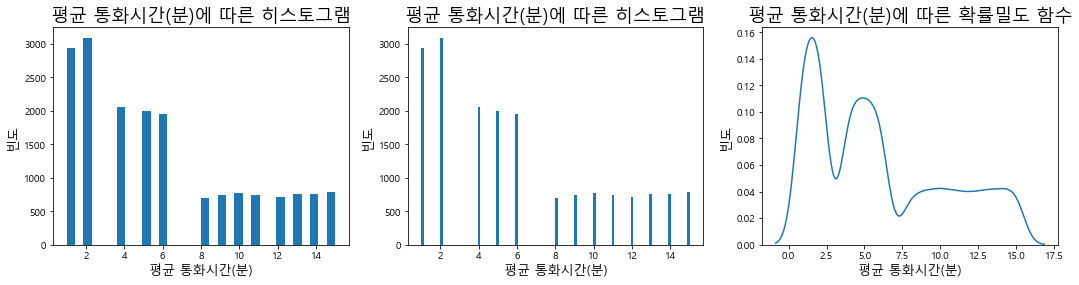

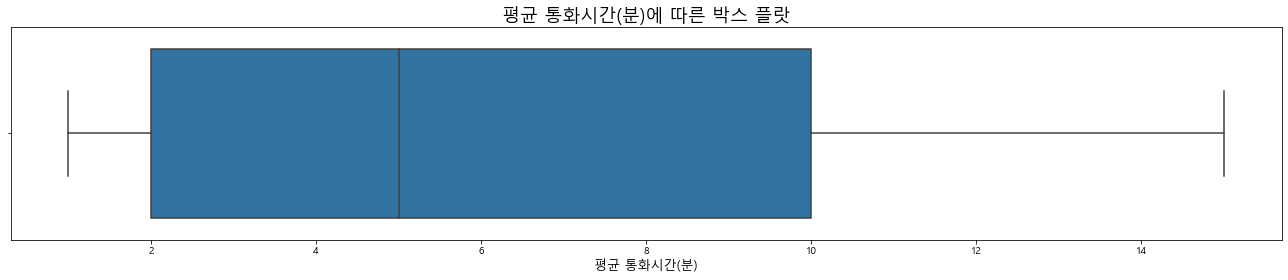

최빈값 :  2


In [31]:
plt.figure(figsize= (18,4))
x = "평균 통화시간(분)"

plt.subplot(1,3,1)
plt.hist(mobile[feature],bins=32)
plt.title(f"{x}에 따른 히스토그램",size= 18)
plt.ylabel("빈도",size = 13)
plt.xlabel(f"{x}",size = 13)


plt.subplot(1,3,2)
plt.hist(mobile[feature],bins=100)
plt.title(f"{x}에 따른 히스토그램",size= 18)
plt.ylabel("빈도",size = 13)
plt.xlabel(f"{x}",size = 13)

plt.subplot(1,3,3)
sns.kdeplot(data=mobile ,x= feature)
plt.title(f"{x}에 따른 확률밀도 함수",size= 18)
plt.ylabel("빈도",size = 13)
plt.xlabel(f"{x}",size = 13)

plt.show()
plt.figure(figsize= (18,4))
sns.boxplot(data=mobile ,x=feature)
plt.title(f"{x}에 따른 박스 플랏",size= 18)
plt.xlabel(f"{x}",size = 13)

plt.tight_layout()
plt.show()
print("최빈값 : ",mobile[feature].mode()[0])

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 00 통신회사의 고객들의 평균 통화 시간이 매우 짧고 간략한 통화만 이루어진는 것으로 판단되다. 왜냐하면 최대값이 15이기 때문에, 통화를 이렇게 짧게 한다면... 해당 통신사의 통화 요금제가 비싼게 아닌가 또는 제약이 있나 생각되며, 해당 확률밀도함수를 보면 봉오리가 3개인것을 알 수 있다. 이를 통해 데이터 성격이 3개가 존재하는 것을 유추할 수 있으며 해당 그래프가 휴대폰 가격과 비슷한 그래프로 보여진다. 휴대폰 가격에 따라 요금제가 비싼 요금제 특정 요금제를 사용하기에 통화 시간이 제한이 있지 않나 생각이 든다.


8) 추가 분석해 볼 사항이 있나요?
* 평균 통화 시간을 구간을 나누기.
* 평균 통화 시간과 휴대폰 가격에 따른 상관관계 분석
* 평균 통화 시간에 따른 고객 번호 이동(이탈) 여부

### 6) INCOME

In [32]:
feature = "INCOME"

mobile[feature].unique()

array([ 47711,  74132, 150419, ...,  82931, 124391, 104849], dtype=int64)

1) 변수의 비즈니스 의미
* 연 수입액(달러)

2) 데이터 유형 : 숫자, 범주?
* 숫자

3) NaN 존재 유무 및 조치 방안

In [33]:
mobile[feature].isna().sum()

0

> Nan값이 존재하지 않는다.

4) 가변수화 필요 여부
* 숫자형이므로 필요 없음

5) 기초통계량(수치화)

In [34]:
mobile[feature].describe()

count     17962.000000
mean      80318.592195
std       41698.185540
min       20007.000000
25%       42172.000000
50%       75510.500000
75%      116082.750000
max      159983.000000
Name: INCOME, dtype: float64

6) 분포 확인(시각화)

C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


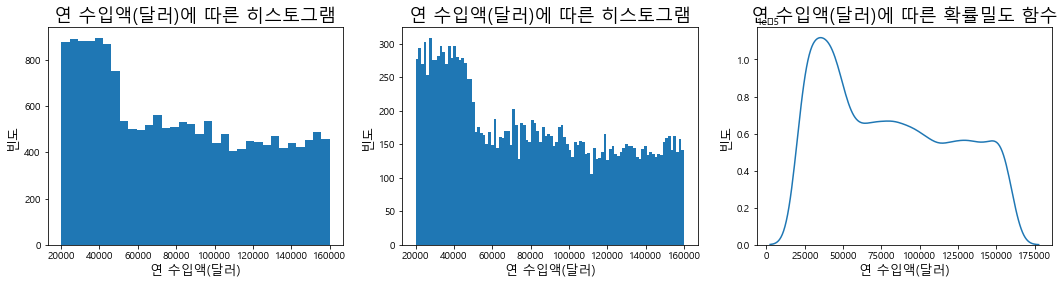

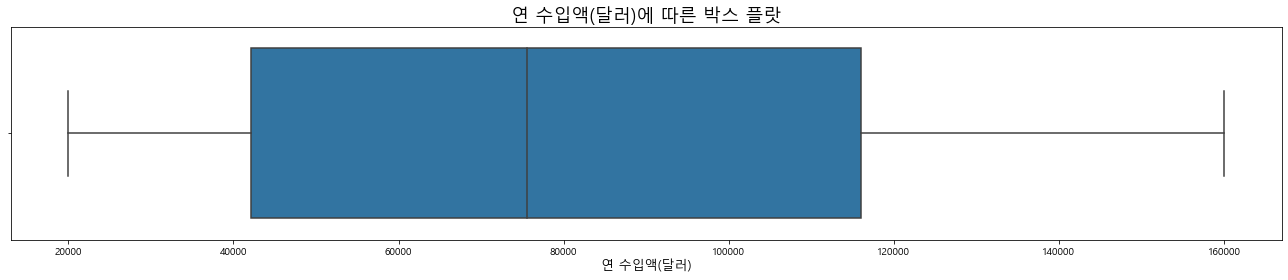

최빈값 :  28798


In [35]:
plt.figure(figsize= (18,4))
x = "연 수입액(달러)"

plt.subplot(1,3,1)
plt.hist(mobile[feature],bins=32)
plt.title(f"{x}에 따른 히스토그램",size= 18)
plt.ylabel("빈도",size = 13)
plt.xlabel(f"{x}",size = 13)


plt.subplot(1,3,2)
plt.hist(mobile[feature],bins=100)
plt.title(f"{x}에 따른 히스토그램",size= 18)
plt.ylabel("빈도",size = 13)
plt.xlabel(f"{x}",size = 13)

plt.subplot(1,3,3)
sns.kdeplot(data=mobile ,x= feature)
plt.title(f"{x}에 따른 확률밀도 함수",size= 18)
plt.ylabel("빈도",size = 13)
plt.xlabel(f"{x}",size = 13)

plt.show()
plt.figure(figsize= (18,4))
sns.boxplot(data=mobile ,x=feature)
plt.title(f"{x}에 따른 박스 플랏",size= 18)
plt.xlabel(f"{x}",size = 13)

plt.tight_layout()
plt.show()
print("최빈값 : ",mobile[feature].mode()[0])

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 00 통신회사의 고객들의 연 수입액이 x 범위가 넓고, 핸드폰 가격과 평균 통화시간과 유사한 모양의 그래프가 보여진다.

8) 추가 분석해 볼 사항이 있나요?
* 연 수입액을 구분.
* 연 수입액에 따라 평균 통화 시간과 휴대폰 가격 등 상관관계 분석
* 연 수입액에 따른 고객 번호 이동(이탈) 여부

### 7) CHURN(target)

In [36]:
feature = "CHURN"

mobile[feature].unique()

array([0, 1], dtype=int64)

1) 변수의 비즈니스 의미
* 번호 이동(이탈)(1: 이탈고객, 0 : 잔존고객)

2) 데이터 유형 : 숫자, 범주?
* 범주

3) NaN 존재 유무 및 조치 방안

In [37]:
mobile[feature].isna().sum()

0

> Nan 존재하지 않음.

4) 가변수화 필요 여부
* 범주형이고, 이진 값으로 가변수화 필요 없음.

5) 기초통계량(수치화)

In [38]:
# 범주별 빈도수
mobile[feature].value_counts()

0    9113
1    8849
Name: CHURN, dtype: int64

6) 시각화

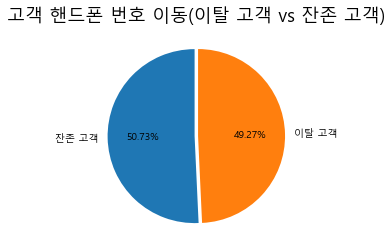

In [39]:
plt.title("고객 핸드폰 번호 이동(이탈 고객 vs 잔존 고객)",size= 18)
table = mobile[feature].value_counts().sort_index()
plt.pie(table.values,
    labels= ["잔존 고객","이탈 고객"],
    autopct = '%.2f%%',startangle=90,explode = [0.02, 0.02])

plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 00 통신 회사 고객이 번호 이동(이탈)하는 고객 비율이 약 49%이며, 잔존하는 고객은 51%이다. 그렇기에 현재 이 00 통신회사는 고객 2명 중 번호 이동을 하는 고객이 약 1명 정도 번호를 이동함으로써 이 문제가 심각하다고 판단되며, 원인을 파악하여 해결해야 한다고 생각이 든다.

8) 추가 분석해 볼 사항이 있나요?
* 이탈하는 원인 파악 및 잔존 고객의 특징 파악.

### 8) COLLEGE

In [40]:
feature = "COLLEGE"

mobile[feature].unique()

array([1, 0], dtype=int64)

1) 변수의 비즈니스 의미
* 대학 졸업 여부(1: 졸업, 0 : 졸업X)

2) 데이터 유형 : 숫자, 범주?
* 범주

3) NaN 존재 유무 및 조치 방안

In [41]:
mobile[feature].isna().sum()

0

> Nan 존재하지 않음.

4) 가변수화 필요 여부
* 범주형이고, 이진 값으로 가변수화 필요 없음.

5) 기초통계량(수치화)

In [42]:
# 범주별 빈도수
mobile[feature].value_counts()

1    9028
0    8934
Name: COLLEGE, dtype: int64

6) 시각화

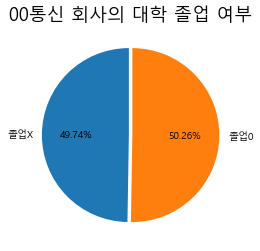

In [43]:
plt.title("00통신 회사의 대학 졸업 여부",size= 18)
table = mobile[feature].value_counts().sort_index()
plt.pie(table.values,
    labels= ["졸업X","졸업0"],
    autopct = '%.2f%%',startangle=90,explode = [0.02, 0.02])

plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 00 통신 회사 고객들의 절반은 대학 졸업을 하였고, 나머지 절반은 졸업을 하지 못한 고객들로 분포되어 있다.

8) 추가 분석해 볼 사항이 있나요?
* 혹시나마, 졸업 여부에 따른 전화번호 이동(이탈) 여부 분석

### 9) 추가2

### 10) 추가3

## 3.이변량 분석 
* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가합니다.
* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 유의수준 : 5%
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.


In [44]:
target = 'CHURN'

### (1) 범주형 Feature --> CHURN
* 모든 범주형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.  
    ① 교차표(pd.crosstab())  
    ② 시각화( Stacked Bar, Mosaic)  
    ③ 가설검정(카이제곱검정)
* 각 feature 별로 관계의 정도를 3가지로 정리해봅시다. 

#### 1) REPORTED_SATISFACTION --> CHURN

In [45]:
feature = 'REPORTED_SATISFACTION'

① 교차표(pd.crosstab())

In [46]:
table = pd.crosstab(mobile[target],mobile[feature], normalize="columns")
display(table)

REPORTED_SATISFACTION,avg,sat,unsat,very_sat,very_unsat
CHURN,,,,,
0,0.527132,0.527897,0.499164,0.511618,0.50099
1,0.472868,0.472103,0.500836,0.488382,0.49901


② 시각화( Stacked Bar, Mosaic)

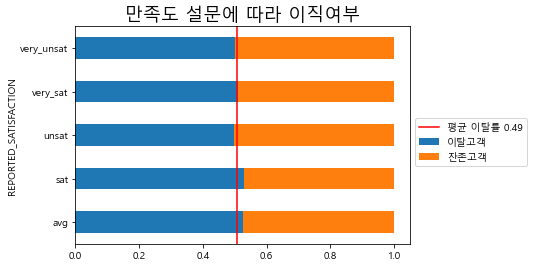

In [47]:
table = pd.crosstab(mobile[feature], mobile[target], normalize = 'index')
xl = "만족도 설문"
table.plot.barh(stacked=True)
plt.axvline(1-mobile[target].mean(), color = 'r')
plt.title(f"{xl}에 따라 이직여부",size= 18)
plt.legend(labels= [f"평균 이탈률 {mobile[target].mean():.2f}",'이탈고객','잔존고객'],
           bbox_to_anchor=(1, 0.6))
plt.show()

시각화를 통해 파악한 내용을 적어 봅시다.

* 1차 분석 결과

   설문 결과에 따라 이탈고객과 잔존 고객의 영향이 적어보인다.

③ 가설검정(카이제곱검정)

In [48]:
table = pd.crosstab(mobile[target],mobile[feature])

# 카이제곱검정
result = spst.chi2_contingency(table)
print(f'카이제곱통계량 {result[0]:.5f}  p-value : {result[1]}')

카이제곱통계량 6.84110  p-value : 0.14452738878905066


* 2차 분석 결과
    
    p_value(유의확률)이 유의수준 5%보다 크기에 대립가설인 만족도에 따라 번호이동(이탈) 여부가 관계(차이)가 있다 라는 가설을 기각하고 귀무가설인 만족도에 따라 번호이동(이탈) 여부의 차이가 없다. 라고 판단되었습니다.

④ 시각화와 가설검정을 통해서 파악한 내용을 적어 봅시다.
* 최종 3차 분석 결과
    
    고객 만족도에 따라서 00 통신 회사의 번호 이동(이탈) 여부에는 큰 차이가 없는 것으로 판단되었습니다.

#### 2) CONSIDERING_CHANGE_OF_PLAN --> CHURN

In [49]:
feature = 'CONSIDERING_CHANGE_OF_PLAN'

① 교차표(pd.crosstab())

In [50]:
table = pd.crosstab(mobile[target],mobile[feature], normalize="columns")
display(table)

CONSIDERING_CHANGE_OF_PLAN,actively_looking_into_it,considering,never_thought,no,perhaps
CHURN,,,,,
0,0.511471,0.510952,0.513333,0.500687,0.475393
1,0.488529,0.489048,0.486667,0.499313,0.524607


② 시각화( Stacked Bar, Mosaic)

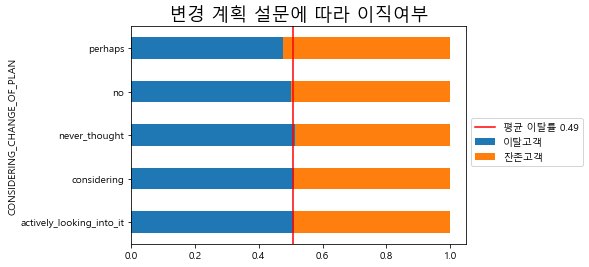

In [51]:
table = pd.crosstab(mobile[feature], mobile[target], normalize = 'index')
xl = "변경 계획 설문"
table.plot.barh(stacked=True)
plt.axvline(1-mobile[target].mean(), color = 'r')
plt.title(f"{xl}에 따라 이직여부",size= 18)
plt.legend(labels= [f"평균 이탈률 {mobile[target].mean():.2f}",'이탈고객','잔존고객'],
           bbox_to_anchor=(1, 0.6))
plt.show()

시각화를 통해 파악한 내용을 적어 봅시다.

* 1차 분석 결과

   변경 계획 설문에 따라 이탈고객과 잔존 고객의 영향이 적어보인다.

③ 가설검정(카이제곱검정)

In [52]:
table = pd.crosstab(mobile[target],mobile[feature])

# 카이제곱검정
result = spst.chi2_contingency(table)
print(f'카이제곱통계량 {result[0]:.5f}  p-value : {result[1]}')

카이제곱통계량 5.47805  p-value : 0.2416656900460956


* 2차 분석 결과
    
    p_value(유의확률)이 유의수준 5%보다 크기에 대립가설인 변경 계획 설문에 따라 번호이동(이탈) 여부가 관계(차이)가 있다 라는 가설을 기각하고 귀무가설인 변경 계획 설문에 따라 번호이동(이탈) 여부의 차이가 없다. 라고 판단되었습니다.

④ 시각화와 가설검정을 통해서 파악한 내용을 적어 봅시다.
* 최종 3차 분석 결과
    
    변경 계획 설문에 따라서 00 통신 회사의 번호 이동(이탈) 여부에는 큰 차이가 없는 것으로 판단되었습니다.

#### 3) COLLEGE --> CHURN

In [53]:
feature = 'COLLEGE'

① 교차표(pd.crosstab())

In [54]:
table = pd.crosstab(mobile[target],mobile[feature], normalize="columns")
display(table)

COLLEGE,0,1
CHURN,,
0,0.516118,0.498671
1,0.483882,0.501329


② 시각화( Stacked Bar, Mosaic)

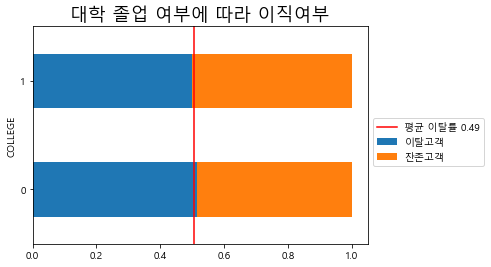

In [55]:
table = pd.crosstab(mobile[feature], mobile[target], normalize = 'index')
xl = "대학 졸업 여부"
table.plot.barh(stacked=True)
plt.axvline(1-mobile[target].mean(), color = 'r')
plt.title(f"{xl}에 따라 이직여부",size= 18)
plt.legend(labels= [f"평균 이탈률 {mobile[target].mean():.2f}",'이탈고객','잔존고객'],
           bbox_to_anchor=(1, 0.6))
plt.show()

시각화를 통해 파악한 내용을 적어 봅시다.

* 1차 분석 결과

   대학 졸업에 따라 이탈고객과 잔존 고객의 영향이 없어보인다.

③ 가설검정(카이제곱검정)

In [56]:
table = pd.crosstab(mobile[target],mobile[feature])

# 카이제곱검정
result = spst.chi2_contingency(table)
print(f'카이제곱통계량 {result[0]:.5f}  p-value : {result[1]}')

카이제곱통계량 5.39929  p-value : 0.020144913376353345


* 2차 분석 결과
    
    p_value(유의확률)이 유의수준 5%보다 크기에 대립가설인 대학졸업에 따라 번호이동(이탈) 여부가 관계(차이)가 있다 라는 가설을 기각하고 귀무가설인 대학졸업에 따라 번호이동(이탈) 여부의 차이가 없다. 라고 판단되었습니다.
    
④ 시각화와 가설검정을 통해서 파악한 내용을 적어 봅시다.
* 최종 3차 분석 결과
    
    대학졸업에 따라서 00 통신 회사의 번호 이동(이탈) 여부에는 큰 차이가 없는 것으로 판단되었습니다.

### (2) 숫자형 Feature --> CHURN

* 숫자형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.  
    ① 그래프 : histogram, densityplot   
    ② 수치화 : 로지스틱회귀

#### 1) LEFTOVER --> CHURN

In [57]:
feature = 'LEFTOVER'

① 그래프 : histogram, densityplot

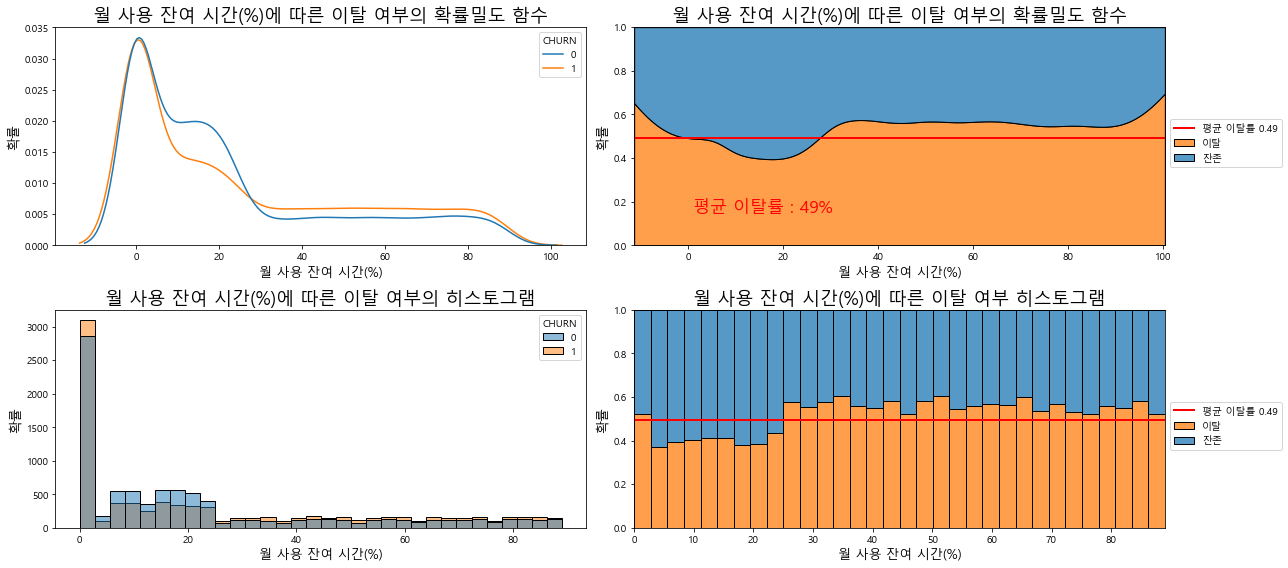

In [58]:
mean_val = mobile[target].mean()
xl = "월 사용 잔여 시간(%)"
plt.figure(figsize= (18,8))
plt.subplot(2,2,1)
sns.kdeplot(data = mobile, x= feature,hue=target,common_norm=False)
plt.title(f"{xl}에 따른 이탈 여부의 확률밀도 함수",size= 18)
plt.ylabel("확률",size = 13)
plt.xlabel(f"{xl}",size = 13)


plt.subplot(2,2,2)
sns.kdeplot(data = mobile, x= feature, hue=target, multiple='fill')
plt.axhline(mean_val,color='r',linewidth=2)
plt.text(1,0.15,f"평균 이탈률 : {mean_val*100:.0f}%",color='r',size=17)

plt.title(f"{xl}에 따른 이탈 여부의 확률밀도 함수",size= 18)
plt.ylabel("확률",size = 13)
plt.xlabel(f"{xl}",size = 13)
plt.legend(labels= [f"평균 이탈률 {mean_val:.2f}",'이탈','잔존'],bbox_to_anchor=(1, 0.6))


plt.subplot(2,2,3)
sns.histplot( data=mobile, x=feature , hue=target, bins = 32)
plt.title(f"{xl}에 따른 이탈 여부의 히스토그램",size= 18)
plt.ylabel("확률",size = 13)
plt.xlabel(f"{xl}",size = 13)


plt.subplot(2,2,4)
sns.histplot( data=mobile, x=feature , hue=target, bins = 32, multiple='fill')
plt.axhline(mean_val,color='r',linewidth=2)

plt.title(f"{xl}에 따른 이탈 여부 히스토그램",size= 18)
plt.ylabel("확률",size = 13)
plt.xlabel(f"{xl}",size = 13)
plt.legend(labels= [f"평균 이탈률 {mean_val:.2f}",'이탈','잔존'],bbox_to_anchor=(1, 0.6))

plt.tight_layout()
plt.show()

시각화를 통해 파악한 내용을 적어 봅시다.

* 1차 분석 결과

    히스토그램과 밀도함수를 보았을때, 월 잔여 시간이 약 26%까지 남음 고객들은 번호 이동을 하지 않고 잔존을 하지만, 26% 이후에 번호 이동으 하는 고객이 평균보다 높기에 휴대폰 월 사용 요금이 높아서 쭉 쓰다 보니 불만도 가지고 다른 00 통신사를 써야하지 않을까? 아니면 번호 이동을 할까 라는 생각을 가지는 것을 추측된다.

② 수치화 : 로지스틱회귀

In [59]:
# 로지스틱 모형을 만들고 통계량을 구해 봅시다.
model = sm.Logit(mobile[target], mobile[feature])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.692538
         Iterations 3
LEFTOVER    0.000003
dtype: float64


* 2차 분석결과

    로지스틱 회귀모델을 통해 월 사용 잔여 시간에 따른 번호이동(이탈) 여부에 대한 관련이 있는지 구해봤는데, p_value가 0.05보다 작기에 월 사용 잔여 시간에 따른 이탈 여부가 관련이 있다고 판단되었다.

③ 시각화와 수치화를 통해 파악한 내용을 적어 봅시다.

* 최종 3차 분석 결과

    히스토그램과 밀도함수를 시각화하였을때, 월 사용 잔여 시간에 따른 이탈 여부의 차이가 보여졌다. 이것을 로지스틱 회귀모델을 통해 수치화 하였을때, p_value가 0.05보다 작기에 월 사용 잔여 시간에 따른 이탈 여부가 달라진다 라는 결과를 도출할 수 있었다.

#### 2) HANDSET_PRICE --> CHURN

In [60]:
feature = 'HANDSET_PRICE'

① 그래프 : histogram, densityplot

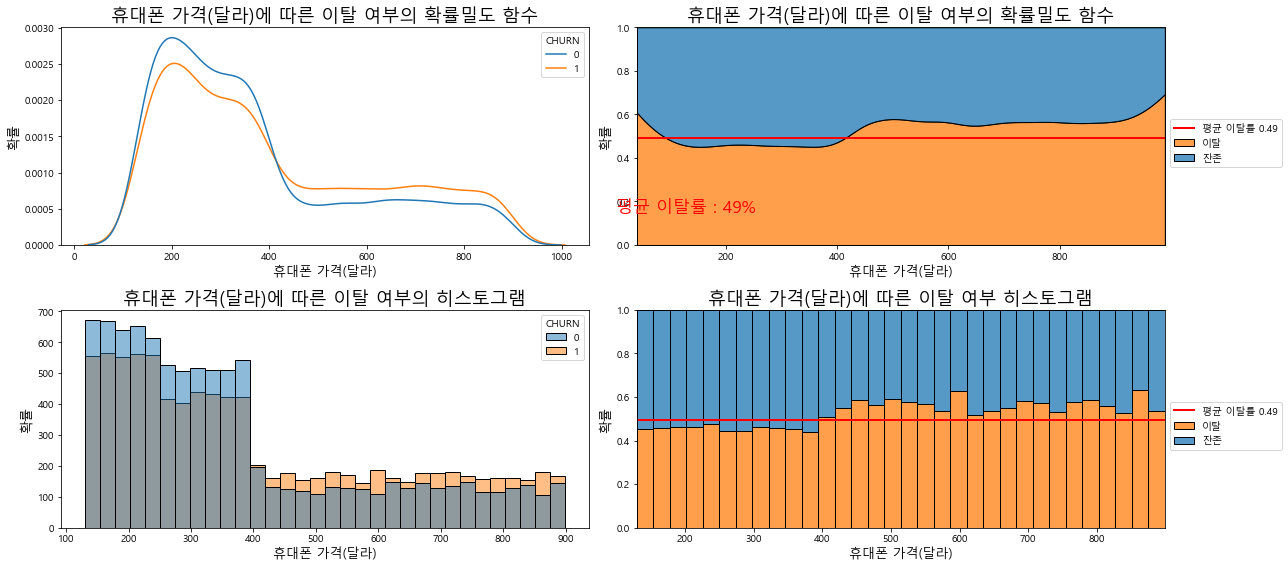

In [61]:
mean_val = mobile[target].mean()
xl = "휴대폰 가격(달라)"
plt.figure(figsize= (18,8))
plt.subplot(2,2,1)
sns.kdeplot(data = mobile, x= feature,hue=target,common_norm=False)
plt.title(f"{xl}에 따른 이탈 여부의 확률밀도 함수",size= 18)
plt.ylabel("확률",size = 13)
plt.xlabel(f"{xl}",size = 13)


plt.subplot(2,2,2)
sns.kdeplot(data = mobile, x= feature, hue=target, multiple='fill')
plt.axhline(mean_val,color='r',linewidth=2)
plt.text(1,0.15,f"평균 이탈률 : {mean_val*100:.0f}%",color='r',size=17)

plt.title(f"{xl}에 따른 이탈 여부의 확률밀도 함수",size= 18)
plt.ylabel("확률",size = 13)
plt.xlabel(f"{xl}",size = 13)
plt.legend(labels= [f"평균 이탈률 {mean_val:.2f}",'이탈','잔존'],bbox_to_anchor=(1, 0.6))


plt.subplot(2,2,3)
sns.histplot( data=mobile, x=feature , hue=target, bins = 32)
plt.title(f"{xl}에 따른 이탈 여부의 히스토그램",size= 18)
plt.ylabel("확률",size = 13)
plt.xlabel(f"{xl}",size = 13)


plt.subplot(2,2,4)
sns.histplot( data=mobile, x=feature , hue=target, bins = 32, multiple='fill')
plt.axhline(mean_val,color='r',linewidth=2)

plt.title(f"{xl}에 따른 이탈 여부 히스토그램",size= 18)
plt.ylabel("확률",size = 13)
plt.xlabel(f"{xl}",size = 13)
plt.legend(labels= [f"평균 이탈률 {mean_val:.2f}",'이탈','잔존'],bbox_to_anchor=(1, 0.6))

plt.tight_layout()
plt.show()

시각화를 통해 파악한 내용을 적어 봅시다.

* 1차 분석 결과

    히스토그램과 밀도함수를 보았을때, 휴대폰 가격이 비싼 400달러 이상 고객들이 400달라 미만 고객에 비해 이탈을 빈번하게 하는 것을 알 수 있다.

② 수치화 : 로지스틱회귀

In [62]:
# 로지스틱 모형을 만들고 통계량을 구해 봅시다.
model = sm.Logit(mobile[target], mobile[feature])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.692730
         Iterations 3
HANDSET_PRICE    0.000109
dtype: float64


* 2차 분석결과

    로지스틱 회귀모델을 통해 핸드폰 가격에 따른 번호이동(이탈) 여부에 대한 관련이 있는지 구해봤는데, p_value가 0.05보다 작기에 핸드폰 가격에 따른 이탈 여부가 관련이 있다고 판단되었다.
    
③ 시각화와 수치화를 통해 파악한 내용을 적어 봅시다.

* 최종 3차 분석 결과

    히스토그램과 밀도함수를 시각화하였을때, 핸드폰 구매 가격에 따른 이탈 여부의 차이가 보여졌다. 이것을 로지스틱 회귀모델을 통해 수치화 하였을때, p_value가 0.05보다 작기에 핸드폰 가격에 따른 이탈 여부가 달라진다 라는 결과를 도출할 수 있었다.

#### 3) AVERAGE_CALL_DURATION --> CHURN

In [63]:
feature = 'AVERAGE_CALL_DURATION'

① 그래프 : histogram, densityplot

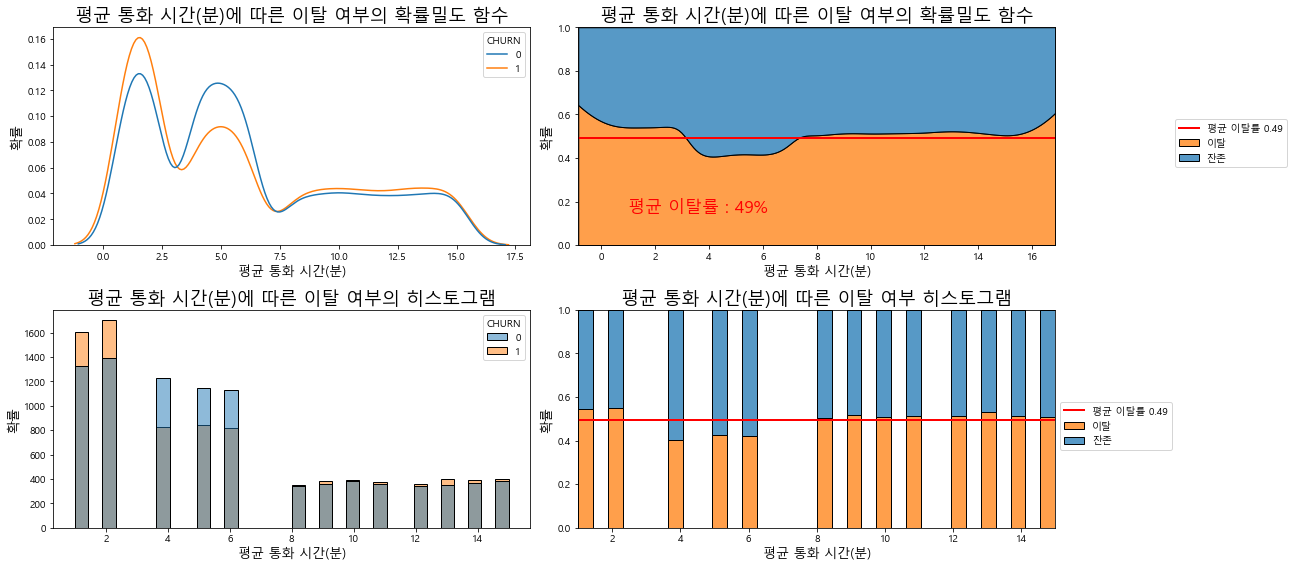

In [64]:
mean_val = mobile[target].mean()
xl = "평균 통화 시간(분)"
plt.figure(figsize= (18,8))
plt.subplot(2,2,1)
sns.kdeplot(data = mobile, x= feature,hue=target,common_norm=False)
plt.title(f"{xl}에 따른 이탈 여부의 확률밀도 함수",size= 18)
plt.ylabel("확률",size = 13)
plt.xlabel(f"{xl}",size = 13)


plt.subplot(2,2,2)
sns.kdeplot(data = mobile, x= feature, hue=target, multiple='fill')
plt.axhline(mean_val,color='r',linewidth=2)
plt.text(1,0.15,f"평균 이탈률 : {mean_val*100:.0f}%",color='r',size=17)

plt.title(f"{xl}에 따른 이탈 여부의 확률밀도 함수",size= 18)
plt.ylabel("확률",size = 13)
plt.xlabel(f"{xl}",size = 13)
plt.legend(labels= [f"평균 이탈률 {mean_val:.2f}",'이탈','잔존'],bbox_to_anchor=(1.24, 0.6))


plt.subplot(2,2,3)
sns.histplot( data=mobile, x=feature , hue=target, bins = 32)
plt.title(f"{xl}에 따른 이탈 여부의 히스토그램",size= 18)
plt.ylabel("확률",size = 13)
plt.xlabel(f"{xl}",size = 13)


plt.subplot(2,2,4)
sns.histplot( data=mobile, x=feature , hue=target, bins = 32, multiple='fill')
plt.axhline(mean_val,color='r',linewidth=2)

plt.title(f"{xl}에 따른 이탈 여부 히스토그램",size= 18)
plt.ylabel("확률",size = 13)
plt.xlabel(f"{xl}",size = 13)
plt.legend(labels= [f"평균 이탈률 {mean_val:.2f}",'이탈','잔존'],bbox_to_anchor=(1, 0.6))

plt.tight_layout()
plt.show()

시각화를 통해 파악한 내용을 적어 봅시다.

* 1차 분석 결과

    히스토그램과 밀도함수를 보았을때, 평균 통화 시간(분)이 짧게 통화(2분이내)를 하는 고객들이 이탈을 하고, 4분에서 6분 이내에 통화를 하는 고객은 잔존을 조금더 하는 결과를 보여주고 있다. 왜 이런 결과를 나왔는지 추후 추가분석때 고민을 해볼 만한 요소로 판단된다. 
    
② 수치화 : 로지스틱회귀

In [65]:
# 로지스틱 모형을 만들고 통계량을 구해 봅시다.
model = sm.Logit(mobile[target], mobile[feature])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.693022
         Iterations 3
AVERAGE_CALL_DURATION    0.033816
dtype: float64


* 2차 분석결과

    로지스틱 회귀모델을 통해 평균 통화 시간에 따른 번호이동(이탈) 여부에 대한 관련이 있는지 구해봤는데, p_value가 0.05보다 작기에 평균 통화 시간에 따른 이탈 여부가 약간 관련이 있다고 판단되었다.

③ 시각화와 수치화를 통해 파악한 내용을 적어 봅시다.

* 최종 3차 분석 결과

    히스토그램과 밀도함수를 시각화하였을때, 평균 통화 시간에 따른 이탈 여부의 차이가 보여졌다. 이것을 로지스틱 회귀모델을 통해 수치화 하였을때, p_value가 0.05보다 작기에 평균 통화 시간에 따른 이탈 여부가 약간 차이가 있다 라고 결과를 도출할 수 있었다.

## 3차 추가분석

In [96]:
feature = "OVERAGE"

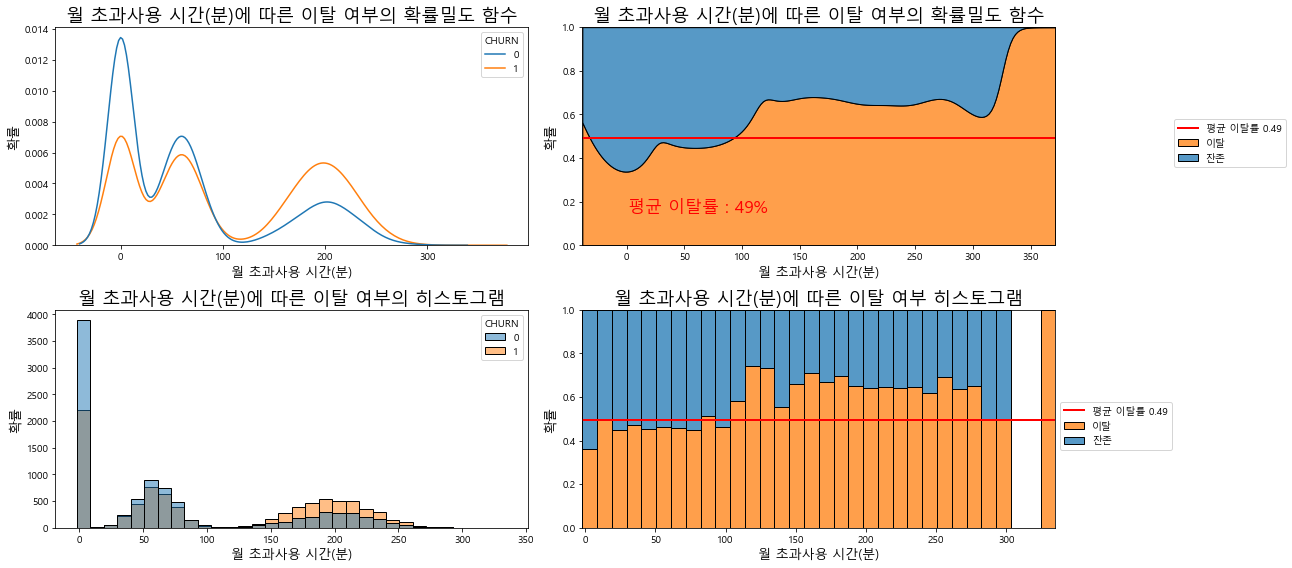

In [98]:
mean_val = mobile[target].mean()
xl = "월 초과사용 시간(분)"
plt.figure(figsize= (18,8))
plt.subplot(2,2,1)
sns.kdeplot(data = mobile, x= feature,hue=target,common_norm=False)
plt.title(f"{xl}에 따른 이탈 여부의 확률밀도 함수",size= 18)
plt.ylabel("확률",size = 13)
plt.xlabel(f"{xl}",size = 13)


plt.subplot(2,2,2)
sns.kdeplot(data = mobile, x= feature, hue=target, multiple='fill')
plt.axhline(mean_val,color='r',linewidth=2)
plt.text(1,0.15,f"평균 이탈률 : {mean_val*100:.0f}%",color='r',size=17)

plt.title(f"{xl}에 따른 이탈 여부의 확률밀도 함수",size= 18)
plt.ylabel("확률",size = 13)
plt.xlabel(f"{xl}",size = 13)
plt.legend(labels= [f"평균 이탈률 {mean_val:.2f}",'이탈','잔존'],bbox_to_anchor=(1.24, 0.6))


plt.subplot(2,2,3)
sns.histplot( data=mobile, x=feature , hue=target, bins = 32)
plt.title(f"{xl}에 따른 이탈 여부의 히스토그램",size= 18)
plt.ylabel("확률",size = 13)
plt.xlabel(f"{xl}",size = 13)


plt.subplot(2,2,4)
sns.histplot( data=mobile, x=feature , hue=target, bins = 32, multiple='fill')
plt.axhline(mean_val,color='r',linewidth=2)

plt.title(f"{xl}에 따른 이탈 여부 히스토그램",size= 18)
plt.ylabel("확률",size = 13)
plt.xlabel(f"{xl}",size = 13)
plt.legend(labels= [f"평균 이탈률 {mean_val:.2f}",'이탈','잔존'],bbox_to_anchor=(1, 0.6))

plt.tight_layout()
plt.show()

시각화를 통해 파악한 내용을 적어 봅시다.

* 1차 분석 결과

    히스토그램과 밀도함수를 보았을때, 월 초과 시간을 약 100분 이상 하는 고객은 평균 이탈률보다 높아지는 것을 알 수 있다.
② 수치화 : 로지스틱회귀

In [99]:
# 로지스틱 모형을 만들고 통계량을 구해 봅시다.
model = sm.Logit(mobile[target], mobile[feature])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.680602
         Iterations 4
OVERAGE    1.269139e-96
dtype: float64


* 2차 분석결과

    로지스틱 회귀모델을 통해 월 초과 사용에 따른 번호이동(이탈) 여부에 대한 관련이 있는지 구해봤는데, p_value가 0.05보다 작기에 월 초과 사용에 따른 이탈 여부가 관련이 있다고 판단되었다.

③ 시각화와 수치화를 통해 파악한 내용을 적어 봅시다.

* 최종 3차 분석 결과

    월 초과 사용시간에 따라 이탈여부가 관련있기에 월 초과 사용하는 고객들을 모아서 비교하면 고객의 유형이 나올테니 그에 맞는 서비스를 제공하면 어떨까? 라는 판단을 한다.

In [101]:
mobile["feature3"] = "very_over"
mobile.loc[mobile[feature]<=100,"feature3"] = "over"
mobile.loc[mobile[feature]<=0,"feature3"] = "pull"

In [102]:
feature = 'feature3'

In [103]:
table = pd.crosstab(mobile[target],mobile[feature], normalize="columns")
display(table)

feature3,over,pull,very_over
CHURN,,,
0,0.539699,0.637883,0.343475
1,0.460301,0.362117,0.656525


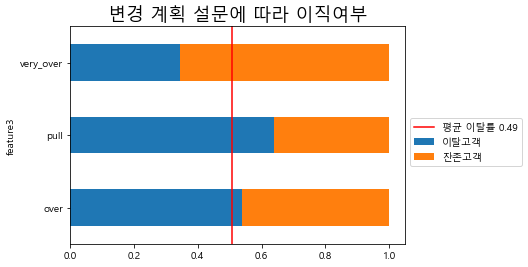

In [104]:
table = pd.crosstab(mobile[feature], mobile[target], normalize = 'index')
xl = "변경 계획 설문"
table.plot.barh(stacked=True)
plt.axvline(1-mobile[target].mean(), color = 'r')
plt.title(f"{xl}에 따라 이직여부",size= 18)
plt.legend(labels= [f"평균 이탈률 {mobile[target].mean():.2f}",'이탈고객','잔존고객'],
           bbox_to_anchor=(1, 0.6))
plt.show()

* pull : 요금제를 다쓴 사람
* over는 요금제를 다쓰고 초과 분을 쓴 집단
* ver over는 요금제를 다쓰고 초과 분을 아주 많이 쓴 집단

In [105]:
table = pd.crosstab(mobile[target],mobile[feature])

# 카이제곱검정
result = spst.chi2_contingency(table)
print(f'카이제곱통계량 {result[0]:.5f}  p-value : {result[1]}')

카이제곱통계량 1086.78378  p-value : 1.01835601461165e-236



④ 시각화와 가설검정을 통해서 파악한 내용을 적어 봅시다.
* 최종 3차 분석 결과
    
    초과 시간 분에 따라서 00 통신 회사의 번호 이동(이탈) 여부에는 큰 차이가 없는 것으로 판단되었고, 그에 맞는 요금제 세분화 서비스 추천.

In [108]:
feature = 'LEFTOVER'

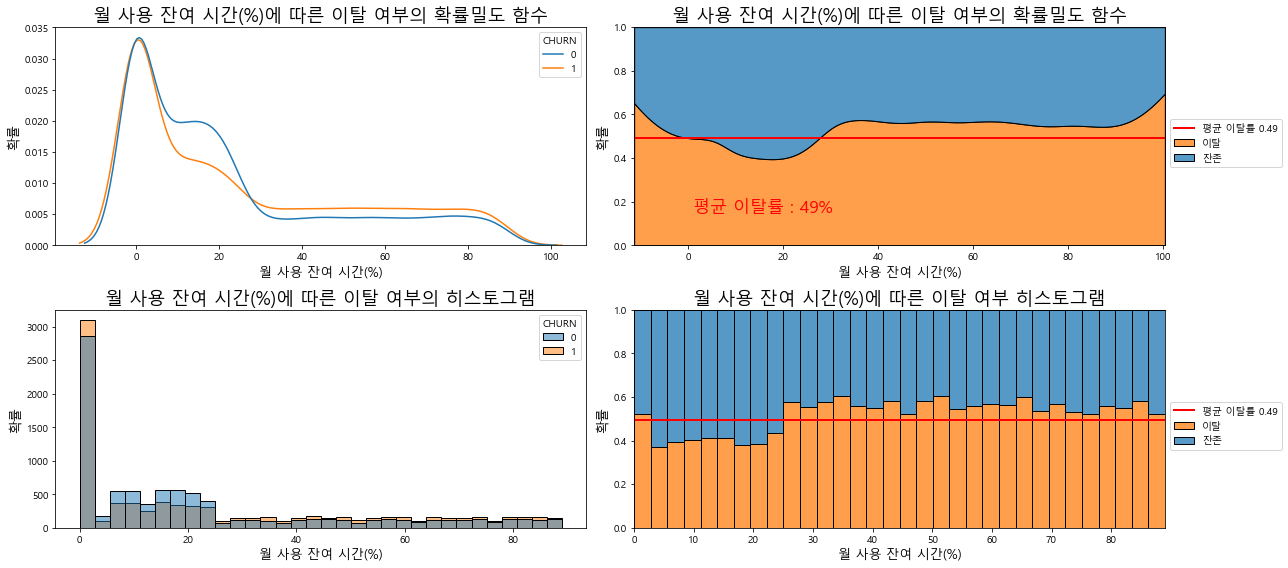

In [109]:
mean_val = mobile[target].mean()
xl = "월 사용 잔여 시간(%)"
plt.figure(figsize= (18,8))
plt.subplot(2,2,1)
sns.kdeplot(data = mobile, x= feature,hue=target,common_norm=False)
plt.title(f"{xl}에 따른 이탈 여부의 확률밀도 함수",size= 18)
plt.ylabel("확률",size = 13)
plt.xlabel(f"{xl}",size = 13)


plt.subplot(2,2,2)
sns.kdeplot(data = mobile, x= feature, hue=target, multiple='fill')
plt.axhline(mean_val,color='r',linewidth=2)
plt.text(1,0.15,f"평균 이탈률 : {mean_val*100:.0f}%",color='r',size=17)

plt.title(f"{xl}에 따른 이탈 여부의 확률밀도 함수",size= 18)
plt.ylabel("확률",size = 13)
plt.xlabel(f"{xl}",size = 13)
plt.legend(labels= [f"평균 이탈률 {mean_val:.2f}",'이탈','잔존'],bbox_to_anchor=(1, 0.6))


plt.subplot(2,2,3)
sns.histplot( data=mobile, x=feature , hue=target, bins = 32)
plt.title(f"{xl}에 따른 이탈 여부의 히스토그램",size= 18)
plt.ylabel("확률",size = 13)
plt.xlabel(f"{xl}",size = 13)


plt.subplot(2,2,4)
sns.histplot( data=mobile, x=feature , hue=target, bins = 32, multiple='fill')
plt.axhline(mean_val,color='r',linewidth=2)

plt.title(f"{xl}에 따른 이탈 여부 히스토그램",size= 18)
plt.ylabel("확률",size = 13)
plt.xlabel(f"{xl}",size = 13)
plt.legend(labels= [f"평균 이탈률 {mean_val:.2f}",'이탈','잔존'],bbox_to_anchor=(1, 0.6))

plt.tight_layout()
plt.show()

시각화를 통해 파악한 내용을 적어 봅시다.

* 1차 분석 결과

   

In [112]:
mobile["feature4"] = "remains_fee"
mobile.loc[mobile[feature] <=0,"feature4"] = "0%"


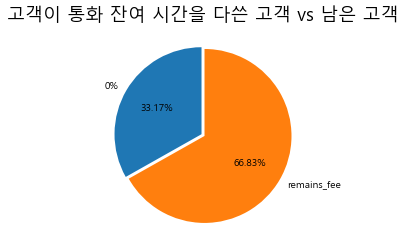

In [115]:
plt.title("고객이 통화 잔여 시간을 다쓴 고객 vs 남은 고객",size= 18)
table = mobile["feature4"].value_counts().sort_index()
plt.pie(table.values,
    labels= table.sort_index().index,
    autopct = '%.2f%%',startangle=90,explode = [0.02, 0.02])

plt.show()

* 클라우드 소싱 서비스를 제고.

## 4.관계 정리

### 1) 강한관계의 변수

LEFTOVER, HANDSET_PRICE

### 2) 약한관계의 변수

AVERAGE_CALL_DURATION

### 3) 관계 없음

REPORTED_SATISFACTION , CONSIDERING_CHANGE_OF_PLAN, COLLEGE

## 5.추가 분석

> 가설6 : 00통신회사의 이용하는 고객이 연 수입액이 증가함에 따라 월 사용 잔여 시간이 하락하는 관계가 있을 것이다.

#### 1) INCOME   --> LEFTOVER
* 데이터 유형
    - X : 숫자 
    - Y : 숫자
    
* 분석 방법
    - 시각화 
        - 산점도 그래프
    - 수치화
        - 상관관계 -> 선형성의 관계인지 파악하고자 함.

In [66]:
target = 'LEFTOVER'
feature1 = 'INCOME'

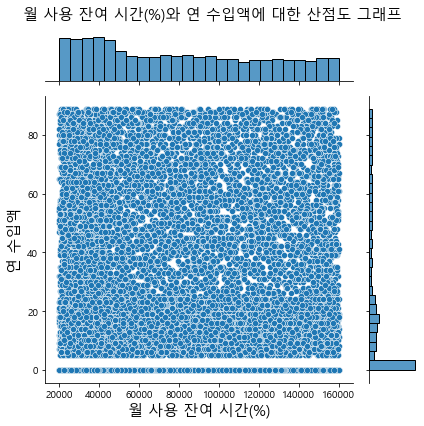

In [67]:
p = sns.jointplot(data = mobile , x=feature1, y =target)
p.fig.suptitle("월 사용 잔여 시간(%)와 연 수입액에 대한 산점도 그래프",fontsize=15)
p.fig.subplots_adjust(top=0.95)
p.ax_joint.set_xlabel('월 사용 잔여 시간(%)',fontsize=15)
p.ax_joint.set_ylabel('연 수입액',fontsize=15)
p.fig.tight_layout()
plt.show()

월 사용 잔여 시간과 연 수입액에 대해서 선형성을 가지는지 파악하고자 산점도 그래프로 시각화를 하였으나 두 변량끼리 선형성은 보이지가 않았다.
* 상관관계

In [68]:
spst.pearsonr(mobile[feature1],mobile[target])

(0.009652237047785214, 0.1958188485251937)

두 변량끼리 상관이 없는 것으로 판단된다.

#### 2) INCOME   --> HANDSET_PRICE
* 데이터 유형
    - X : 숫자 
    - Y : 숫자
    
* 분석 방법
    - 시각화 
        - 산점도 그래프
    - 수치화
        - 상관관계 -> 선형성의 관계인지 파악하고자 함.

In [69]:
target = 'HANDSET_PRICE'
feature1 = 'INCOME'

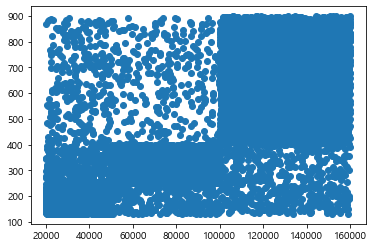

In [70]:
plt.scatter(data = mobile , x=feature1, y =target)

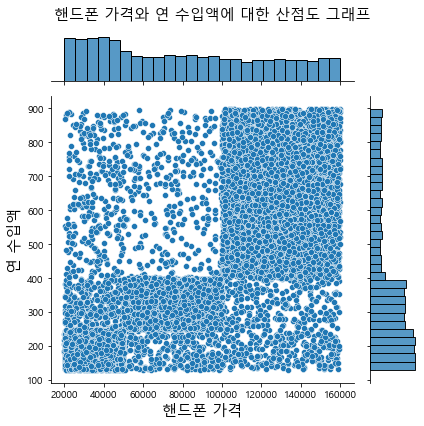

In [71]:
p = sns.jointplot(data = mobile , x=feature1, y =target)
p.fig.suptitle("핸드폰 가격와 연 수입액에 대한 산점도 그래프",fontsize=15)
p.fig.subplots_adjust(top=0.95)
p.ax_joint.set_xlabel('핸드폰 가격',fontsize=15)
p.ax_joint.set_ylabel('연 수입액',fontsize=15)
p.fig.tight_layout()
plt.show()

산점도 그래프를 보았을때 두 변량끼리 선형성은 보이지 않지만, 해당 그래프를 통해 구간을 나눌 수 있겠다는 아이디어가 떠올랐다. 그 이유는 핸드폰 가격이 싸면서 연수입이 적은 고객과 연수입이 적은데 비싼 휴대폰을 쓰는 고객으로 나눌 수 있었고, 연수입이 높은데 핸드폰 가격이 저렴한 휴대폰을 쓰는 고객도 파악이 가능하였다. -> 가성비 가심비 고객유형

* 상관관계

In [72]:
spst.pearsonr(mobile[feature1],mobile[target])

(0.7260445271437173, 0.0)

두 변량끼리 양의 상관관계를 가지는 것을 알 수 있었다.

* 추가 분석

    - 핸드폰 가격이 10000달러 지점과 연수입 400 달라 기준으로 4분위를 나누어 이탈여부에 영향을 끼치는지 살펴보고자 한다.

In [73]:
mobile["INCOME"].describe()

count     17962.000000
mean      80318.592195
std       41698.185540
min       20007.000000
25%       42172.000000
50%       75510.500000
75%      116082.750000
max      159983.000000
Name: INCOME, dtype: float64

In [74]:
mobile.loc[(mobile["HANDSET_PRICE"] <= 400)  & (mobile["INCOME"] <= 100000),"feature1"] = 1
mobile.loc[(mobile["HANDSET_PRICE"] <= 400)  & (mobile["INCOME"] > 100000),"feature1"] = 2
mobile.loc[(mobile["HANDSET_PRICE"] > 400)  & (mobile["INCOME"] <= 100000),"feature1"] = 3
mobile.loc[(mobile["HANDSET_PRICE"] > 400)  & (mobile["INCOME"] > 100000),"feature1"] = 4

In [75]:
mobile["feature1"]

0        1.0
1        1.0
2        4.0
3        4.0
4        1.0
        ... 
17995    1.0
17996    4.0
17997    1.0
17998    4.0
17999    4.0
Name: feature1, Length: 17962, dtype: float64

In [76]:
target = 'CHURN'
feature = 'feature1'

#### 3) feature1   --> CHURN
* 데이터 유형
    - X : 범주 
    - Y : 범주
    
* 분석 방법
    - 시각화 
        - stacked bar
    - 수치화
        - 카이제곱 검정

① 교차표(pd.crosstab())

In [77]:
table = pd.crosstab(mobile[target],mobile[feature], normalize="columns")
display(table)

feature1,1.0,2.0,3.0,4.0
CHURN,,,,
0,0.548853,0.449573,0.552542,0.423427
1,0.451147,0.550427,0.447458,0.576573


② 시각화( Stacked Bar, Mosaic)

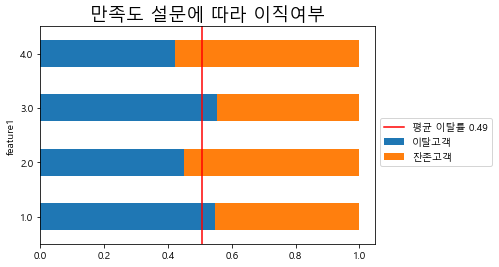

In [78]:
table = pd.crosstab(mobile[feature], mobile[target], normalize = 'index')
xl = "만족도 설문"
table.plot.barh(stacked=True)
plt.axvline(1-mobile[target].mean(), color = 'r')
plt.title(f"{xl}에 따라 이직여부",size= 18)
plt.legend(labels= [f"평균 이탈률 {mobile[target].mean():.2f}",'이탈고객','잔존고객'],
           bbox_to_anchor=(1, 0.6))
plt.show()

시각화를 통해 파악한 내용을 적어 봅시다.

* 1차 분석 결과

   연수입과 휴대폰 가격을 통해 만든 feature에 따라 이탈 여부에 영향이 있어보인다.

③ 가설검정(카이제곱검정)

In [79]:
table = pd.crosstab(mobile[target],mobile[feature])

# 카이제곱검정
result = spst.chi2_contingency(table)
print(f'카이제곱통계량 {result[0]:.5f}  p-value : {result[1]}')

카이제곱통계량 245.35735  p-value : 6.6058279188191235e-53


* 2차 분석 결과
    
    p_value(유의확률)이 유의수준 5%보다 작기에 대립가설인 연수입과 휴대폰 가격을 통해 만든 feature에 따라 번호이동(이탈) 여부가 관계(차이)가 있다 라고 판단된다.
    
④ 시각화와 가설검정을 통해서 파악한 내용을 적어 봅시다.
* 최종 3차 분석 결과
    
    연수입과 휴대폰 가격을 통해 만든 feature에 따라 번호이동(이탈) 여부가 관계(차이)가 있다 라고 판단됩니다.

## 추가 분석 결론 및 관계 정리

### 1) 강한관계의 변수

연수입과 핸드폰 가격을 통해 만든 변수 -> 이탈여부에 강한 관계를 가짐

### 2) 관계 없음

월 사용 잔여시간(%)과 연 수입과 상관관계가 없다.



## 결론

번호를 변경하는 고객의 유형이 존재하는 것으로 판단된다. 왜냐하면 연수입과 핸드폰 가격을 통해 파생된 변수로 부터 핸드폰 번호 이동(이탈)에 대한 관계(차이)가 있는지 파악하였는데, 위 가설이 채택되었기에 아직 전부다 분석한것은 아니지만 더 분석하면 핸드폰 번호이동(이탈)하는 고객에 유형이 있을 것으로 추정됩니다.